# Phase Space - Vibration of H$_{2}$

Let's look more closely at the vibrational motion in the H$_{2}$ molecule.

We have seen already that, provided the nuclei do not deviate too far from their equilibrium position, the potential energy surface for this molecule can be approximated as a simple harmonic potential,

<center> $U_{\text{stretch}} = k(\Delta R)^{2}$.</center>

Run the  code cell below. Drag the slider to see how the energy of the molecule changes with the H-H bond length as a function of time.



In [ ]:
#@title 🧪🧪🧪
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output, display
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# globals
xmin = 0.751
k = 1020.0

def harmonic_energy(k, r, xmin):
    return k * (r - xmin) ** 2

# slider widget (bond length)
slider = widgets.FloatSlider(
    value=0.751,
    min=0.2,
    max=1.3,
    step=0.001,
    description="Bond length R (Å)",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".3f",
)

def update_plot(r):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(6, 4));
    ax.set_ylim([0, 400])
    ax.set_xlim([0.2, 1.3])
    ax.set_ylabel("Energy (kJ/mol)")
    ax.set_xlabel("Bond length R (Å)")
    ax.grid(True)

    # full curve over bond lengths
    x_positions = np.linspace(0.2, 1.3, 500)
    y_energies = harmonic_energy(k, x_positions, xmin)
    ax.plot(x_positions, y_energies, color='blue', label='Harmonic curve')

    # red marker at selected bond length
    x_marker = r
    y_marker = harmonic_energy(k, r, xmin)
    ax.plot([x_marker], [y_marker], marker="o", color='red', markersize=10, label='Current state')

    ax.legend()
    plt.show()
    plt.close(fig)

# connect widget to update and suppress spurious output
interactive_plot = widgets.interactive(update_plot, r=slider)
display(interactive_plot)


Is there a more useful way of visualising the vibrational motion of this bond?? Let's consider how the bond length itself changes over time, rather than the energy. A harmonic potential means that the force that changes the H-H bond length is,

<center> $\mathbf{F} = m\mathbf{a} = -kR$ </center>

This force leads to the bond length $R$ and momentum $p$ changing over time $t$ according to,

<center> $R(t) \sim A\cos(\omega R)$ </center>

where $\omega$ is the frequency of the bond vibration,

<center> $\omega = \sqrt{\frac{k}{m}} $</center>

and $A$ is the amplitude (which we artificially set to 0.5 Angstrom in this example). Similarly, since the bond is in motion, it has an effective momentum (recall that $p = mv$!) of

<center> $p(t) = mv = m\frac{dR}{dt} \sim -Am\omega\sin(\omega R)$ </center>

Run the following code cells to visualise how the bond length $R$ and corresponding momentum $p$ evolve over time, as the bond vibrates.

In [ ]:
#@title  🧪🧪🧪
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# declare globals
xmin = 0.751
k = 1020.0
A = 0.5
m = 1.08 * 1.08 / (1.08 + 1.08)
w = np.sqrt(k / m)
x0 = xmin
tstart = 0.0
tend = 3 * 2 * np.pi / w
tarray = np.linspace(tstart, tend, 2000)

def harmonic_position(w, t, A):
    return A * np.cos(w * t)

def harmonic_momentum(w, t, m):
    return -m * w * np.sin(w * t)

# set up plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), gridspec_kw={'wspace': 0.4})

# Bond length over time
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[0].plot(tarray, xmin + harmonic_position(w, tarray, A), color='blue')

# Momentum over time
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Momentum (amu·m/s)")
ax[1].grid(True)
ax[1].plot(tarray, harmonic_momentum(w, tarray, m), color='red')

plt.show()

Clearly, the momentum and bond length here are related to each other. Instead of plotting them side by side, we can instead plot them on the same graph - to show directly how a change in one leads to a change in the other (and vice versa).

Such a plot is known as the **phase space** of the molecule. A molecule's phase space is a complete description of how the motion of the atoms in the molecule are determined by their position.

What does the phase space here look like? Run the following code cell to plot the harmonic potential and corresponding phase space below. Click play to see how the energy of the molecule changes with the H-H bond length as a function of time, and how the bond length and momentum trace out a **trajectory** in phase space. Use the controls to play, pause and stop the animation.

In [ ]:
#@title 🧪🧪🧪
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import output
import time

# --- Constants ---
xmin = 0.751
k = 1020.0
A = 0.5
m = 1.08 * 1.08 / (1.08 + 1.08)
w = np.sqrt(k / m)

# --- Trajectory ---
t_period = 2 * np.pi / w
num_frames = 36
t_vals = np.linspace(0, t_period, num_frames)
r_traj = xmin + A * np.cos(w * t_vals)
p_traj = -m * w * np.sin(w * t_vals)

def harmonic_energy(k, r, xmin):
    return k * (r - xmin) ** 2

# --- Output areas ---
plot_out = widgets.Output()
button_out = widgets.Output()

# --- State ---
state = {
    'frame': 0,
    'playing': False
}

def update_plot(i):
    with plot_out:
        clear_output(wait=True)
        r = r_traj[i]
        p = p_traj[i]
        t = t_vals[i]

        fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace': 0.4})

        # Energy
        r_vals = np.linspace(0.2, 1.3, 500)
        energy_vals = harmonic_energy(k, r_vals, xmin)
        ax[0].plot(r_vals, energy_vals, 'b', label='Harmonic Energy')
        ax[0].plot([r], [harmonic_energy(k, r, xmin)], 'ro', markersize=10)
        ax[0].set_xlabel("Bond length R (Å)")
        ax[0].set_ylabel("Energy (kJ/mol)")
        ax[0].set_xlim([0.2, 1.3])
        ax[0].set_ylim([0, 400])
        ax[0].grid(True)
        ax[0].legend()

        # Momentum
        ax[1].plot(r_traj, p_traj, 'b', label='Momentum')
        ax[1].plot([r], [p], 'ro', markersize=10)
        ax[1].set_xlabel("Bond length R (Å)")
        ax[1].set_ylabel("Momentum (amu m/s)")
        ax[1].set_xlim([0.2, 1.3])
        ax[1].set_ylim([-max(abs(p_traj)), max(abs(p_traj))])
        ax[1].grid(True)
        ax[1].legend()

        plt.suptitle(f"Time: {t:.3f} s")
        plt.show()
        plt.close(fig)

# --- Animation loop step ---
def step_animation():
    if not state['playing']:
        return
    update_plot(state['frame'])
    state['frame'] = (state['frame'] + 1) % num_frames

    # Fixed delay: ~30 ms (safe maximum refresh rate)
    from IPython.display import Javascript
    display(Javascript("""
        setTimeout(() => {
            google.colab.kernel.invokeFunction('notebook.step_animation', [], {});
        }, 10);
    """))

# --- Button handlers ---
def on_play_clicked(b):
    if not state['playing']:
        state['playing'] = True
        step_animation()

def on_pause_clicked(b):
    state['playing'] = False

def on_stop_clicked(b):
    state['playing'] = False
    state['frame'] = 0
    update_plot(0)

# --- Buttons ---
play_btn = widgets.Button(description="▶ Play", button_style='success')
pause_btn = widgets.Button(description="⏸ Pause")
stop_btn = widgets.Button(description="⏹ Stop", button_style='danger')

play_btn.on_click(on_play_clicked)
pause_btn.on_click(on_pause_clicked)
stop_btn.on_click(on_stop_clicked)

# --- Display ---
with button_out:
    display(widgets.HBox([play_btn, pause_btn, stop_btn]))

output.register_callback('notebook.step_animation', step_animation)

display(button_out)
display(plot_out)
update_plot(0)

Why is understanding phase space important for running molecular dynamics??

**Because it leads to one of the most important aspects of any molecular dynamics simulation - the <u>simulation time step</u>.**

To see why, lets look at the evolution of the bond length $R$ and momentum $p$ over time again. This time, we will use a slightly longer time scale.

The plots above show the **exact** bond length (blue) and momentum (red) curves. How are these approximated if we use discrete timesteps in an MD simulation of the H$_{2}$ molecule? Use the widget below to investigate this question. Select different values of the force constant $k$ (this controls how strong the H-H bond is, i.e. how quickly it vibrates), and the timestep (in ps). The **exact** trajectory in phase space will be shown in the top row of plots, while the **approximate** trajectory will appear below it, as a function of simulation time.  

<br></br>
Based on what you find, consider the following questions.

1. What do you notice about the description of the bond length (blue), momentum (red), and phase space trajectory (green) in the MD trajectory, as the timestep changes?
1. Relative to the frequency of the vibration, what would you say is a 'good' time step?
1. What do you think a reasonable trade-off is between simulation time and your answer to the previous question? Does this depend on the value of the force constant $k$?

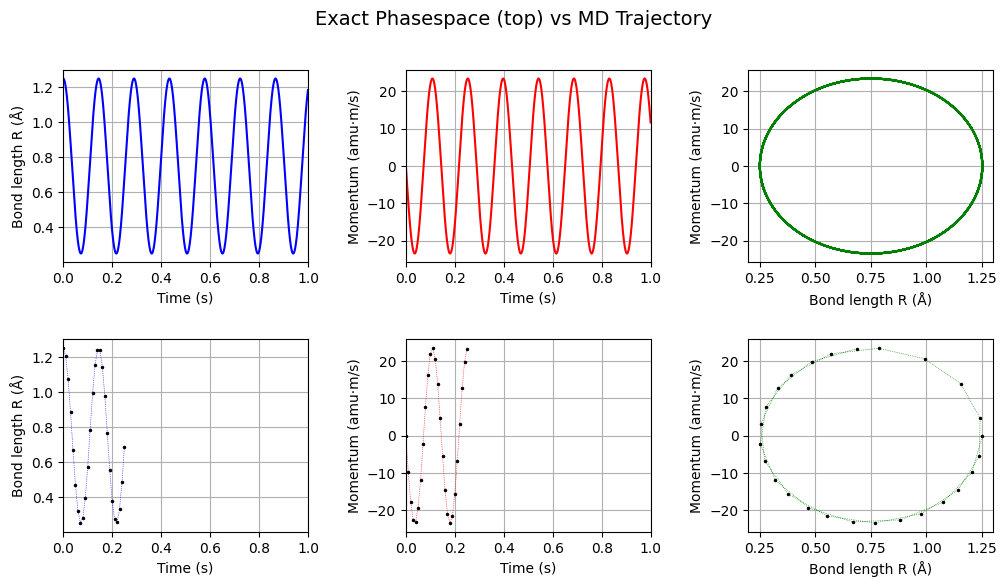

In [ ]:
#@title 🧪🧪🧪
# Clean version: Submit-only animation, no Reset button

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
from google.colab import output
import warnings
warnings.filterwarnings("ignore")

# Constants & animation state
xmin = 0.751
A = 0.5
m = 1.08 * 1.08 / (1.08 + 1.08)
fixed_time = 1.0

animation_state = {
    "approx_tarray": None,
    "r_dots": None,
    "p_dots": None,
    "k": 1020.0,
    "timestep": 0.01,
    "w": np.sqrt(1020.0 / m),
    "plot_out": widgets.Output()
}

def harmonic_position(w, t, A):
    return A * np.cos(w * t)

def harmonic_momentum(w, t, m):
    return -m * w * np.sin(w * t)

def animate_step(frame_index):
    with animation_state["plot_out"]:
        clear_output(wait=True)

        k = animation_state["k"]
        timestep = animation_state["timestep"]
        w = animation_state["w"]
        t_end = fixed_time

        approx_tarray = animation_state["approx_tarray"]
        r_dots = animation_state["r_dots"]
        p_dots = animation_state["p_dots"]

        t_slice = approx_tarray[:frame_index]
        r_slice = r_dots[:frame_index]
        p_slice = p_dots[:frame_index]

        tarray = np.linspace(0, t_end, 2000)
        r_smooth = xmin + harmonic_position(w, tarray, A)
        p_smooth = harmonic_momentum(w, tarray, m)

        fig, ax = plt.subplots(2, 3, figsize=(12, 6), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})

        ax[0, 0].plot(tarray, r_smooth, color='blue')
        ax[0, 1].plot(tarray, p_smooth, color='red')
        ax[0, 2].plot(r_smooth, p_smooth, color='green')

        for a in ax[0]:
            if a is not ax[0, 2]:
                a.set_xlim(0, t_end)
            a.grid(True)

        ax[0,2].set_xlim(0.2,1.3)
        ax[1,2].set_xlim(0.2,1.3)

        ax[0, 0].set(xlabel="Time (s)", ylabel="Bond length R (Å)")
        ax[0, 1].set(xlabel="Time (s)", ylabel="Momentum (amu·m/s)")
        ax[0, 2].set(xlabel="Bond length R (Å)", ylabel="Momentum (amu·m/s)")

        ax[1, 0].set(xlabel="Time (s)", ylabel="Bond length R (Å)")
        ax[1, 1].set(xlabel="Time (s)", ylabel="Momentum (amu·m/s)")
        ax[1, 2].set(xlabel="Bond length R (Å)", ylabel="Momentum (amu·m/s)")

        ax[1, 0].plot(t_slice, r_slice, linestyle='dotted', color='blue', linewidth=0.5)
        ax[1, 0].plot(t_slice, r_slice, marker='.', linestyle='None', color='black', markersize=3)

        ax[1, 1].plot(t_slice, p_slice, linestyle='dotted', color='red', linewidth=0.5)
        ax[1, 1].plot(t_slice, p_slice, marker='.', linestyle='None', color='black', markersize=3)

        ax[1, 2].plot(r_slice, p_slice, linestyle='dotted', color='green', linewidth=0.5)
        ax[1, 2].plot(r_slice, p_slice, marker='.', linestyle='None', color='black', markersize=3)

        for i in range(3):
            if i < 2:
                ax[1, i].set_xlim(0, t_end)
            ax[1, i].set_ylim(ax[0, i].get_ylim())
            ax[1, i].grid(True)

        fig.suptitle(f"Exact Phasespace (top) vs MD Trajectory", fontsize=14)
        plt.show()
        plt.close(fig)

output.register_callback('notebook.animate_step', animate_step)

# UI widgets
k_input = widgets.BoundedFloatText(value=1020.0, min=1.0, max=5000.0, step=10.0, description='k (N/m):')
timestep_input = widgets.BoundedFloatText(value=0.15, min=0.0001, max=0.25, step=0.001, description='Timestep:')
submit_btn = widgets.Button(description="Submit", button_style='primary')
input_row = widgets.HBox([k_input, timestep_input, submit_btn])

# Submit handler
def update_animation_state(b=None):
    k = k_input.value
    timestep = timestep_input.value
    w = np.sqrt(k / m)
    t_end = fixed_time
    approx_tarray = np.arange(0, t_end, timestep)
    r_dots = xmin + harmonic_position(w, approx_tarray, A)
    p_dots = harmonic_momentum(w, approx_tarray, m)

    animation_state.update({
        "k": k,
        "timestep": timestep,
        "w": w,
        "approx_tarray": approx_tarray,
        "r_dots": r_dots,
        "p_dots": p_dots
    })

    frame_count = len(approx_tarray)

    display(Javascript(f"""
    async function animatePoints() {{
      let frames = {frame_count};
      for (let i = 1; i <= frames; i++) {{
        await new Promise(resolve => setTimeout(resolve, 10));
        google.colab.kernel.invokeFunction('notebook.animate_step', [i], {{}});
      }}
    }}
    animatePoints();
    """))

# Bind and display
submit_btn.on_click(update_animation_state)
display(input_row)
display(animation_state["plot_out"])